Installing Faker to generate realistic and random data for various purposes. It provides a wide range of data types and functionalities to generate fake data, including names, addresses, phone numbers, email addresses, dates, and more.

In [1]:
pip install faker

# Installing Necessary Libraries

In [2]:
from faker import Faker
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = Faker()

# Creating a Name column

In [4]:
def create_names(n):
    names = []
    for _ in range(n):
        names.append(df.name())
    return names

In [5]:
name = create_names(400000)

In [6]:
df_name = pd.DataFrame(list(zip(name)),columns = ['Name'])
df_name.head()

,Name
0,Richard Santana
1,William Valdez
2,Lori Bryant
3,Amy May
4,Benjamin Perez


In [7]:
df_name.shape

(400000, 1)

# Creating a race column

In [8]:
def weighted_cartesian_choice(*iterables):
    # An arbitrary number of tuple or lists,each consisting of population and weights.weighted_cartesian_choice returns a list 
    #with a chocie from each population
    
    res = []
    for population, weights in iterables:
     #normalize weight:
        weights = np.array(weights) / sum(weights)
        lst = np.random.choice(population, p=weights)
        res.append(lst)
    return res
race = (['White','Hispanic', 'Black','Asian'], 
        [.32,.28,.22,.18])

list=[]
for i in range(400000):
    res = weighted_cartesian_choice(race)
    list.append(res)

In [9]:
df_race=pd.DataFrame(list, columns = ['Race'])
df_race.head()

,Race
0,Asian
1,Black
2,White
3,Asian
4,White


# Concatenating new columns to create final dataset

In [10]:
df_nr = pd.concat([df_name, df_race], axis=1).reindex(df_race.index)

In [11]:
df_drugs = pd.read_csv('webmd.csv')

In [12]:
data_drugs = pd.concat([df_nr, df_drugs], axis=1).reindex(df_drugs.index)
data_drugs.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Richard Santana,Asian,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724.0,5.0,5.0,I'm a retired physician and of all the meds I ...,5.0,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0.0
1,William Valdez,Black,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724.0,5.0,5.0,cleared me right up even with my throat hurtin...,5.0,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1.0
2,Lori Bryant,White,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731.0,2.0,3.0,why did my PTINR go from a normal of 2.5 to ov...,3.0,Female,,0.0
3,Amy May,Asian,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731.0,2.0,2.0,FALLING AND DON'T REALISE IT,1.0,Female,,0.0
4,Benjamin Perez,White,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731.0,1.0,1.0,My grandfather was prescribed this medication ...,1.0,Male,,1.0


In [13]:
#Converting dataframe into CSV file
data_drugs = data_drugs.to_csv('dataset_drugs.csv', index=False)

In [14]:
#Loading the Dataset
df1 = pd.read_csv('dataset_drugs.csv')
df1.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Richard Santana,Asian,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724.0,5.0,5.0,I'm a retired physician and of all the meds I ...,5.0,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0.0
1,William Valdez,Black,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724.0,5.0,5.0,cleared me right up even with my throat hurtin...,5.0,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1.0
2,Lori Bryant,White,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731.0,2.0,3.0,why did my PTINR go from a normal of 2.5 to ov...,3.0,Female,,0.0
3,Amy May,Asian,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731.0,2.0,2.0,FALLING AND DON'T REALISE IT,1.0,Female,,0.0
4,Benjamin Perez,White,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731.0,1.0,1.0,My grandfather was prescribed this medication ...,1.0,Male,,1.0


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Name           362806 non-null  object 
 1   Race           362806 non-null  object 
 2   Age            362806 non-null  object 
 3   Condition      362806 non-null  object 
 4   Date           362806 non-null  object 
 5   Drug           362806 non-null  object 
 6   DrugId         362806 non-null  float64
 7   EaseofUse      362806 non-null  float64
 8   Effectiveness  362806 non-null  float64
 9   Reviews        362769 non-null  object 
 10  Satisfaction   362806 non-null  float64
 11  Sex            362806 non-null  object 
 12  Sides          362806 non-null  object 
 13  UsefulCount    362806 non-null  float64
dtypes: float64(5), object(9)
memory usage: 38.8+ MB


In [16]:
df1.shape

(362806, 14)

In [17]:
df1.isnull().sum()

Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [18]:
df1.dtypes

Name              object
Race              object
Age               object
Condition         object
Date              object
Drug              object
DrugId           float64
EaseofUse        float64
Effectiveness    float64
Reviews           object
Satisfaction     float64
Sex               object
Sides             object
UsefulCount      float64
dtype: object

# # Descriptive Statistics

In [19]:
df1.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [20]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
DrugId,362806.0,36879.370774,52624.412971,1.0,4896.0,9548.0,63522.0,178546.0
EaseofUse,362806.0,4.019829,1.317711,1.0,3.0,5.0,5.0,10.0
Effectiveness,362806.0,3.532061,1.455961,1.0,3.0,4.0,5.0,10.0
Satisfaction,362806.0,3.135408,1.611106,1.0,1.0,3.0,5.0,10.0
UsefulCount,362806.0,6.744916,9.324240,0.0,1.0,4.0,9.0,255.0


In [21]:
df1.describe(include='object').T

,count,unique,top,freq
Name,362806,180605,Michael Smith,180
Race,362806,4,White,115794
Age,362806,12,45-54,80043
Condition,362806,1806,Other,49765
Date,362806,4524,10/29/2007,404
Drug,362806,7093,cymbalta,4648
Reviews,362769,250159,,41824
Sex,362806,3,Female,238226
Sides,362806,1651,,17460


In [22]:
#Checking for any duplicate values
df1.duplicated().sum()

0

In [23]:
#checking for the column names
df1.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [24]:
#Unique occurances of each variable
for i in df1.columns:
    print(i,':',df1[i].nunique(),'\n')

Name : 180605 

Race : 4 

Age : 12 

Condition : 1806 

Date : 4524 

Drug : 7093 

DrugId : 6572 

EaseofUse : 7 

Effectiveness : 7 

Reviews : 250159 

Satisfaction : 7 

Sex : 3 

Sides : 1651 

UsefulCount : 148 



# Classifying the categorical variables

In [25]:
cat_var = []

for column in df1:
    if df1[column].dtype == 'O':
        cat_var.append(column)
cat_var

['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'Reviews', 'Sex', 'Sides']

In [26]:
df1['Race'].value_counts()

White       115794
Hispanic    101782
Black        79587
Asian        65643
Name: Race, dtype: int64

In [27]:
df1['Age'].value_counts()

45-54         80043
55-64         75136
35-44         55011
25-34         49718
65-74         41216
19-24         24230
75 or over    15226
              12202
13-18          7045
12-Jul         1644
6-Mar           838
0-2             497
Name: Age, dtype: int64

In [28]:
df1['Sex'].value_counts()

Female    238226
Male       98043
           26537
Name: Sex, dtype: int64

In [29]:
df1['Drug'].value_counts().head(20)

cymbalta                                               4648
lisinopril                                             4269
lisinopril solution                                    4269
lexapro                                                4134
hydrocodone-acetaminophen                              3944
effexor xr                                             3486
lyrica                                                 3069
tramadol hcl er                                        2932
tramadol hcl                                           2932
zoloft                                                 2662
prednisone tablet, delayed release (enteric coated)    2576
prednisone concentrate                                 2576
prednisone                                             2576
seroquel                                               2446
phentermine hcl                                        2367
celexa                                                 2224
topamax                                 

# Selection of drug 
A particular drug named Celexa with DrugId 8603 is selected in building a classification model 
to determine side effects

In [30]:
drug_celexa= df1.loc[(df1['Drug'] =='celexa')]
drug_celexa.head(5)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
355486,Cory Navarro,White,,Depression,2/29/2020,celexa,8603.0,5.0,5.0,No Script or health Insurance needed to place ...,5.0,,"Nausea , dry mouth , loss of appetite, tiredn...",11.0
355507,Kyle Nelson,Black,25-34,Depression,1/7/2020,celexa,8603.0,1.0,4.0,"I felt like the depression was at bay, but it ...",2.0,Female,"Nausea , dry mouth , loss of appetite, tiredn...",0.0
355521,Patricia Conner,Black,19-24,Depression,12/16/2019,celexa,8603.0,4.0,2.0,Was switched to Celexa after Cipralex started ...,2.0,Female,"Nausea , dry mouth , loss of appetite, tiredn...",1.0
355543,James Howell,Asian,65-74,Depression,8/12/2019,celexa,8603.0,5.0,5.0,I have been taking Celexa since it was first a...,5.0,,"Nausea , dry mouth , loss of appetite, tiredn...",5.0
355564,James Valenzuela,Black,25-34,Obsessive Compulsive Disorder,6/2/2019,celexa,8603.0,5.0,5.0,No Script or health Insurance needed to place ...,5.0,Male,"Nausea , dry mouth , loss of appetite, tiredn...",90.0


In [31]:
drug_celexa.shape

(2224, 14)

In [32]:
drug_celexa['Condition'].value_counts()

Depression                                1227
Repeated Episodes of Anxiety               331
Panic Disorder                             204
Other                                      130
Bipolar Depression                         115
"Change of Life" Signs                      73
Posttraumatic Stress Syndrome               66
Obsessive Compulsive Disorder               30
Major Depressive Disorder                   28
Anxiousness associated with Depression      20
Name: Condition, dtype: int64

In [33]:
drug_celexa['Condition'].value_counts().sum()

2224

In [34]:
data_new = drug_celexa.copy()

In [36]:
data_copy = df1.copy()

# Data Preprocessing

In [37]:
# Handling instances with whitespaces
for i in data_new:
    data_new[i]=np.where(data_new[i]==" ",np.NAN,data_new[i])

In [38]:
data_new.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
355486,Cory Navarro,White,NaN,Depression,2/29/2020,celexa,8603.0,5.0,5.0,No Script or health Insurance needed to place ...,5.0,NaN,"Nausea , dry mouth , loss of appetite, tiredn...",11.0
355507,Kyle Nelson,Black,25-34,Depression,1/7/2020,celexa,8603.0,1.0,4.0,"I felt like the depression was at bay, but it ...",2.0,Female,"Nausea , dry mouth , loss of appetite, tiredn...",0.0
355521,Patricia Conner,Black,19-24,Depression,12/16/2019,celexa,8603.0,4.0,2.0,Was switched to Celexa after Cipralex started ...,2.0,Female,"Nausea , dry mouth , loss of appetite, tiredn...",1.0
355543,James Howell,Asian,65-74,Depression,8/12/2019,celexa,8603.0,5.0,5.0,I have been taking Celexa since it was first a...,5.0,NaN,"Nausea , dry mouth , loss of appetite, tiredn...",5.0
355564,James Valenzuela,Black,25-34,Obsessive Compulsive Disorder,6/2/2019,celexa,8603.0,5.0,5.0,No Script or health Insurance needed to place ...,5.0,Male,"Nausea , dry mouth , loss of appetite, tiredn...",90.0


In [39]:
#checking missing values
data_new.isnull().sum()

Name               0
Race               0
Age               65
Condition          0
Date               0
Drug               0
DrugId             0
EaseofUse          0
Effectiveness      0
Reviews          292
Satisfaction       0
Sex              100
Sides              0
UsefulCount        0
dtype: int64

In [44]:
# Removing rows with null data
data_new=data_new.dropna(axis=0)

In [46]:
data_new.isnull().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [47]:
data_new.shape

(1828, 14)

# Text Processing

In [48]:
# converting rows having data other than string datatype into  string.
for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Sides']) != str:
        data_new.iloc[i]['Sides'] = str(data_new.iloc[i]['Sides'])

for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Reviews']) != str:
        data_new.iloc[i]['Reviews'] = str(data_new.iloc[i]['Reviews'])
        
for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Condition']) != str:
        data_new.iloc[i]['Condition'] = str(data_new.iloc[i]['Condition'])

In [49]:
import re
def cleaning_text(i):
    i = re.sub("[^A-Za-z" "]+"," ",i).lower()
    i = re.sub("[0-9" "]+"," ",i)
    i= re.sub("[\W+""]", " ",i)        
    w = []
    for word in i.split(" "):
        if len(word)>3:
            w.append(word)
    return (" ".join(w))

Side Effects

In [50]:
data_new.Sides= data_new.Sides.apply(cleaning_text)
data_new.Sides

355507    nausea mouth loss appetite tiredness drowsines...
355521    nausea mouth loss appetite tiredness drowsines...
355564    nausea mouth loss appetite tiredness drowsines...
355603    nausea mouth loss appetite tiredness drowsines...
355649    nausea mouth loss appetite tiredness drowsines...
                                ...                        
361502    nausea mouth loss appetite tiredness drowsines...
361503    nausea mouth loss appetite tiredness drowsines...
361504    nausea mouth loss appetite tiredness drowsines...
361505    nausea mouth loss appetite tiredness drowsines...
361506    nausea mouth loss appetite tiredness drowsines...
Name: Sides, Length: 1828, dtype: object

In [51]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
data_new['Sides'] = data_new['Sides'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dayana\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [55]:
data_new.Sides

355507    nausea mouth loss appetite tiredness drowsines...
355521    nausea mouth loss appetite tiredness drowsines...
355564    nausea mouth loss appetite tiredness drowsines...
355603    nausea mouth loss appetite tiredness drowsines...
355649    nausea mouth loss appetite tiredness drowsines...
                                ...                        
361502    nausea mouth loss appetite tiredness drowsines...
361503    nausea mouth loss appetite tiredness drowsines...
361504    nausea mouth loss appetite tiredness drowsines...
361505    nausea mouth loss appetite tiredness drowsines...
361506    nausea mouth loss appetite tiredness drowsines...
Name: Sides, Length: 1828, dtype: object

Reviews

In [52]:
data_new.reviews= data_new.Reviews.apply(cleaning_text)
data_new.reviews

355507    felt like depression made anxiety skyrocket si...
355521    switched celexa after cipralex started working...
355564    script health insurance needed place order nic...
355603    have been taking celexa around months after be...
355649    please have your doctor start lower milligram ...
                                ...                        
361502    originally prescrobed celexa deal with omgoimg...
361503    taking celexa along with wellbutrin this combo...
361504    suffer from depression noticed that when forgo...
361505    have depression generalized anxiety bulimia ne...
361506    have depression anxiety ptsd many many years f...
Name: Reviews, Length: 1828, dtype: object

In [53]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
data_new['Reviews'] = data_new['Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dayana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
data_new['Reviews']

355507    I felt like depression bay, made anxiety skyro...
355521    Was switched Celexa Cipralex started working m...
355564    No Script health Insurance needed place order....
355603    I taking Celexa around 6 months diagnosed agor...
355649    Please doctor start lower milligram ( im 10mg ...
                                ...                        
361502    I originally prescrobed Celexa deal omgoimg se...
361503    I taking Celexa along Wellbutrin xl combo best...
361504    I suffer depression noticed I 've forgotten ta...
361505    I depression, generalized anxiety, bulimia ner...
361506    I depression w/ anxiety PTSD many, many years....
Name: Reviews, Length: 1828, dtype: object

Condition

In [56]:
data_new.Condition=data_new.Condition.apply(cleaning_text)
data_new.Condition

355507                       depression
355521                       depression
355564    obsessive compulsive disorder
355603                            other
355649                   panic disorder
                      ...              
361502                   panic disorder
361503                   panic disorder
361504                       depression
361505                       depression
361506                            other
Name: Condition, Length: 1828, dtype: object

Handling Age Group

In [57]:
data_new['Age'].value_counts()

25-34         419
45-54         368
35-44         368
55-64         288
19-24         203
65-74          90
13-18          63
75 or over     28
12-Jul          1
Name: Age, dtype: int64

In [59]:
data_new['Age'].unique()

array(['25-34', '19-24', '45-54', '13-18', '35-44', '55-64', '65-74',
       '75 or over', '12-Jul'], dtype=object)

In [60]:
data_new['Age']=data_new['Age'].str.replace('75 or over','75-100')

In [61]:
data_new = data_new[data_new['Age'] != '12-Jul']

In [62]:
data_new['Age'].value_counts()

25-34     419
45-54     368
35-44     368
55-64     288
19-24     203
65-74      90
13-18      63
75-100     28
Name: Age, dtype: int64

# Handling Outliers

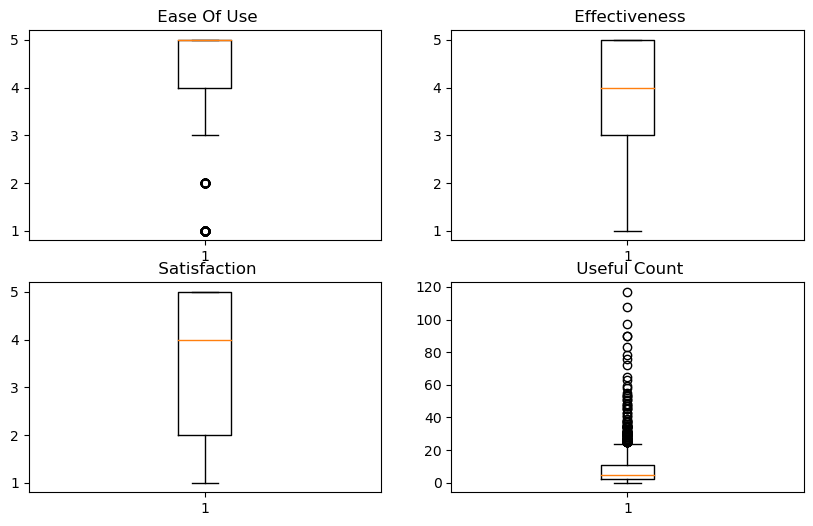

In [63]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_new["EaseofUse"])
plt.title(" Ease Of Use")

plt.subplot(2,2,2)
plt.boxplot(data_new["Effectiveness"])
plt.title(" Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(data_new["Satisfaction"])
plt.title(" Satisfaction")

plt.subplot(2,2,4)
plt.boxplot(data_new["UsefulCount"])
plt.title(" Useful Count")
plt.show()

In [64]:
# define a function called 'outliers' which returns a list of outliers
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
#create list to store indexes of outliers
    ls= df.index[(df[ft]<lower) | (df[ft]>upper)]
    return ls

In [65]:
#create an empty list to store indexes from multiple columns
index_list=[]
for feature in ['UsefulCount', 'EaseofUse']:
    index_list.extend(outliers(data_new,feature))
index_list

[355564,
 355806,
 355906,
 355918,
 356048,
 356118,
 356161,
 356199,
 356219,
 356415,
 356489,
 356555,
 356591,
 356597,
 356645,
 356663,
 356697,
 356853,
 356855,
 356861,
 356873,
 356875,
 356907,
 356939,
 356983,
 356989,
 357031,
 357061,
 357067,
 357189,
 357195,
 357219,
 357223,
 357233,
 357235,
 357239,
 357243,
 357245,
 357251,
 357293,
 357299,
 357353,
 357395,
 357421,
 357433,
 357437,
 357491,
 357495,
 357539,
 357565,
 357583,
 357599,
 357605,
 357678,
 357711,
 357716,
 357747,
 357956,
 358178,
 358226,
 358248,
 358262,
 358276,
 358478,
 358510,
 358516,
 358530,
 358554,
 358570,
 358576,
 358608,
 358640,
 358836,
 358910,
 359557,
 359954,
 360072,
 360097,
 360122,
 360133,
 360256,
 360269,
 360296,
 360387,
 360407,
 360413,
 360434,
 360436,
 360437,
 360516,
 360627,
 360686,
 360700,
 360725,
 360739,
 360887,
 360991,
 361005,
 361083,
 361159,
 361179,
 361195,
 361286,
 361304,
 361305,
 361310,
 361324,
 361325,
 361356,
 361363,
 361482,
 

In [66]:
#define a function called 'remove' which returns a cleaned data without outliers
def remove(df,ls):
    ls=sorted(set(ls)) #to sort and remove multiple copies(to get unique)
    df=df.drop(ls)
    return df

In [67]:
data_new.shape

(1827, 14)

In [68]:
data_new=remove(data_new,index_list)

In [69]:
data_new.shape

(1547, 14)

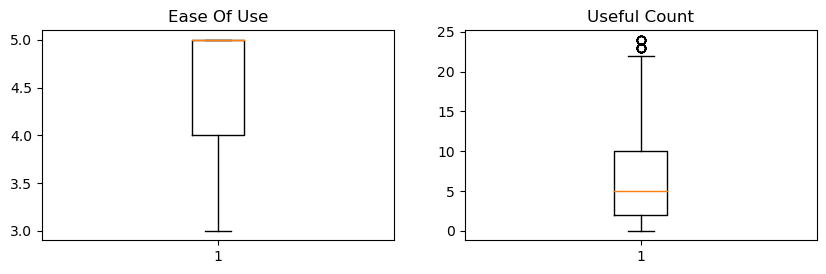

In [72]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.boxplot(data_new["EaseofUse"])
plt.title("Ease Of Use")

plt.subplot(2, 2, 2)
plt.boxplot(data_new["UsefulCount"])
plt.title("Useful Count")

plt.show()

Satisfaction column

In [73]:
data_new['Satisfaction'].value_counts()

5.0    521
4.0    341
3.0    289
1.0    237
2.0    159
Name: Satisfaction, dtype: int64

# Feature Engineering

In [75]:
data1=np.where(data_new['Satisfaction'] == 1.0, "Nil", data_new['Satisfaction'])
data1=np.where(data_new['Satisfaction'] == 2.0, "Mild",data1)
data1=np.where(data_new['Satisfaction'] == 3.0, "Moderate", data1)
data1=np.where(data_new['Satisfaction'] == 4.0, "Severe", data1)
data1=np.where(data_new['Satisfaction'] == 5.0, "Extreme",data1)

In [76]:
data_new['SideEffects']=data1

In [79]:
#Dropping the 'DrugId' column 
data_new.drop(['Satisfaction','DrugId'], inplace=True, axis=1)

KeyError: "['Satisfaction', 'DrugId'] not found in axis"

In [80]:
data_new.head()

,Name,Race,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,Sex,Sides,UsefulCount,SideEffects
355521,Patricia Conner,Black,19-24,depression,12/16/2019,celexa,4.0,2.0,Was switched Celexa Cipralex started working m...,Female,nausea mouth loss appetite tiredness drowsines...,1.0,Mild
355603,Jason Stevens,White,45-54,other,4/17/2019,celexa,5.0,4.0,I taking Celexa around 6 months diagnosed agor...,Female,nausea mouth loss appetite tiredness drowsines...,1.0,Severe
355649,Luis Williams,Hispanic,25-34,panic disorder,3/30/2019,celexa,4.0,5.0,Please doctor start lower milligram ( im 10mg ...,Male,nausea mouth loss appetite tiredness drowsines...,1.0,Extreme
355664,Steven Johnson,Black,19-24,major depressive disorder,2/21/2019,celexa,5.0,4.0,I feel lot better since I began taking medicat...,Female,nausea mouth loss appetite tiredness drowsines...,0.0,Severe
355711,Shannon Mooney,Hispanic,19-24,depression,9/4/2018,celexa,5.0,3.0,It worked made feel physically emotionally dra...,Male,nausea mouth loss appetite tiredness drowsines...,7.0,Moderate


In [81]:
data_copy = data_new.copy()

# Correlation

<AxesSubplot:>

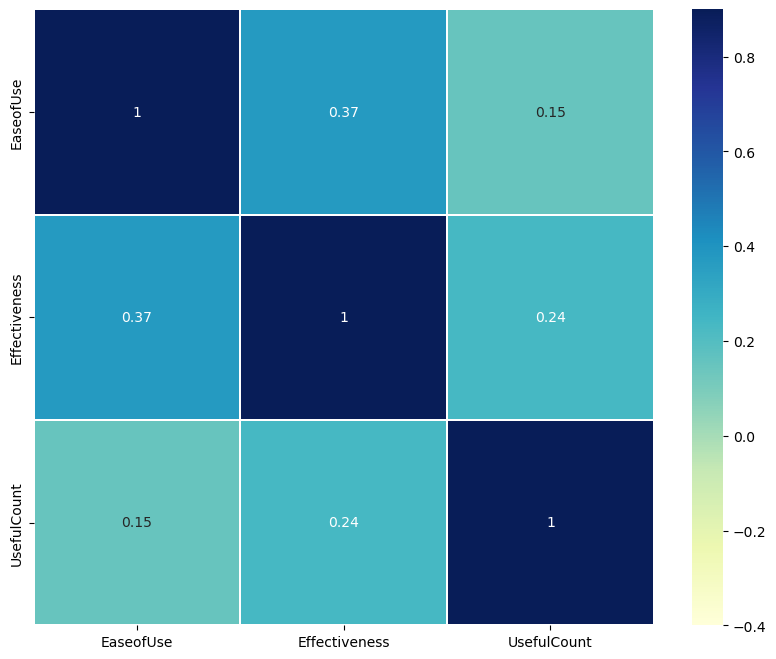

In [82]:
corrmatrix = data_new.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

In [83]:
#Here, being common, dropped the Drug, Sides columns. The other columns such as Date, Name, Reviews and UsefulCount are also 
#dropped since these doesn't deal with side effects of the drug.
data_new=data_new.drop(columns = ['Name','Drug','Date','Sides','Reviews','UsefulCount'],axis=1)
data_new=data_new.reset_index(drop=True)
data_new.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Sex,SideEffects
0,Black,19-24,depression,4.0,2.0,Female,Mild
1,White,45-54,other,5.0,4.0,Female,Severe
2,Hispanic,25-34,panic disorder,4.0,5.0,Male,Extreme
3,Black,19-24,major depressive disorder,5.0,4.0,Female,Severe
4,Hispanic,19-24,depression,5.0,3.0,Male,Moderate


In [84]:
data_new.shape

(1547, 7)

In [85]:
#Finding categorical columns and chnaging datatype
for cl in data_new.select_dtypes(include = ['object']):
    data_new[cl]=data_new[cl].astype('category')
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Race           1547 non-null   category
 1   Age            1547 non-null   category
 2   Condition      1547 non-null   category
 3   EaseofUse      1547 non-null   float64 
 4   Effectiveness  1547 non-null   float64 
 5   Sex            1547 non-null   category
 6   SideEffects    1547 non-null   category
dtypes: category(5), float64(2)
memory usage: 33.1 KB


# Label Encoding

In [88]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
#for col in ['SideEffects', 'Drug','Age','Sex']:
for col in ['Race','Age','Sex','Condition','SideEffects']:   
    data_new[col]=label.fit_transform((data_new[col]).astype(str))
    
data_label=data_new

In [89]:
data_new.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Sex,SideEffects
0,1,1,3,4.0,2.0,0,1
1,3,4,6,5.0,4.0,0,4
2,2,2,7,4.0,5.0,1,0
3,1,1,4,5.0,4.0,0,4
4,2,1,3,5.0,3.0,1,2


# Scaling

In [90]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scale=['Effectiveness','EaseofUse']
data_new[scale] = ss.fit_transform(data_new[scale])

In [91]:
data_model = data_new.copy()

# EDA

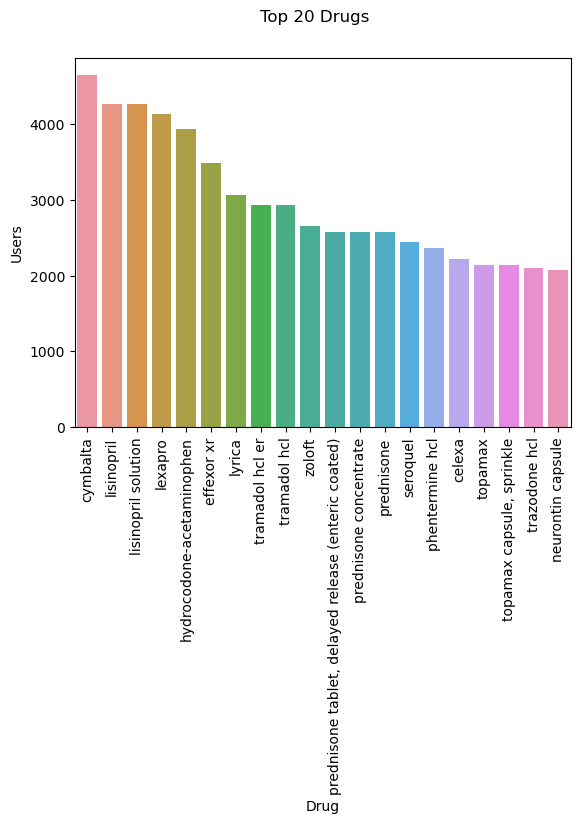

In [94]:
data1= df1['Drug'].value_counts().head(20).reset_index()
data1.columns = ['Drug', 'Users']
sns.barplot(data=data1, x = 'Drug', y = 'Users')
plt.suptitle("Top 20 Drugs")
plt.xticks(rotation=90,fontsize=10)
plt.show()

# Celexa 

Text(0, 0.5, 'Count')

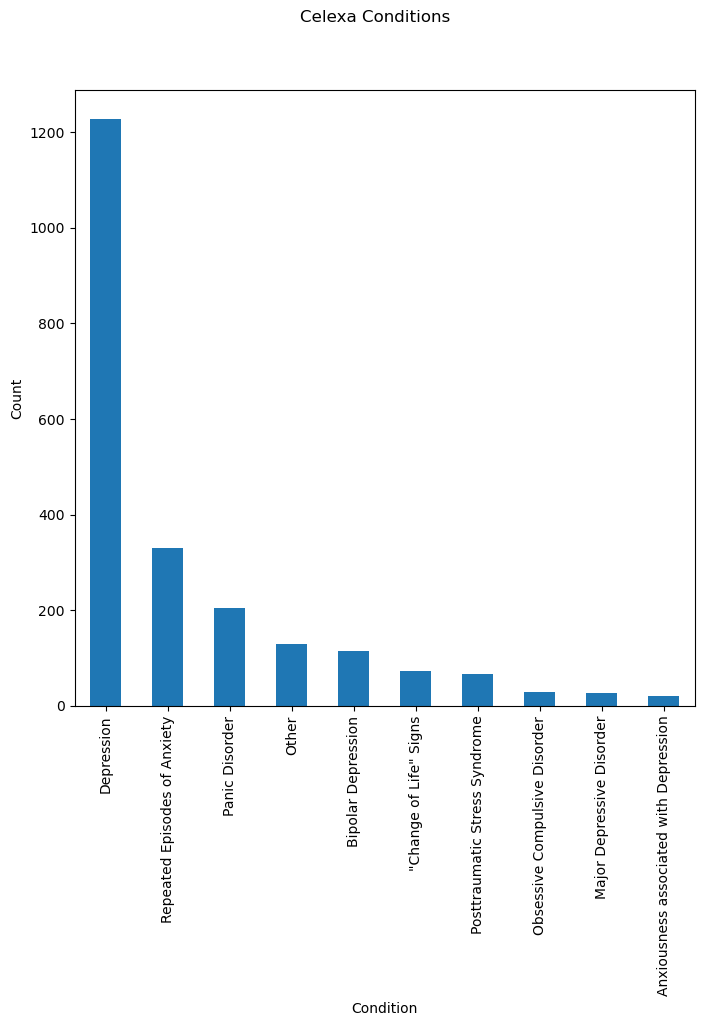

In [97]:
plt.figure(figsize = (4,4))
drug_celexa['Condition'].value_counts().nlargest(12).plot(kind='bar',figsize=(8,8))
plt.suptitle("Celexa Conditions")
plt.xlabel('Condition')
plt.ylabel('Count')

Text(0, 0.5, 'Users')

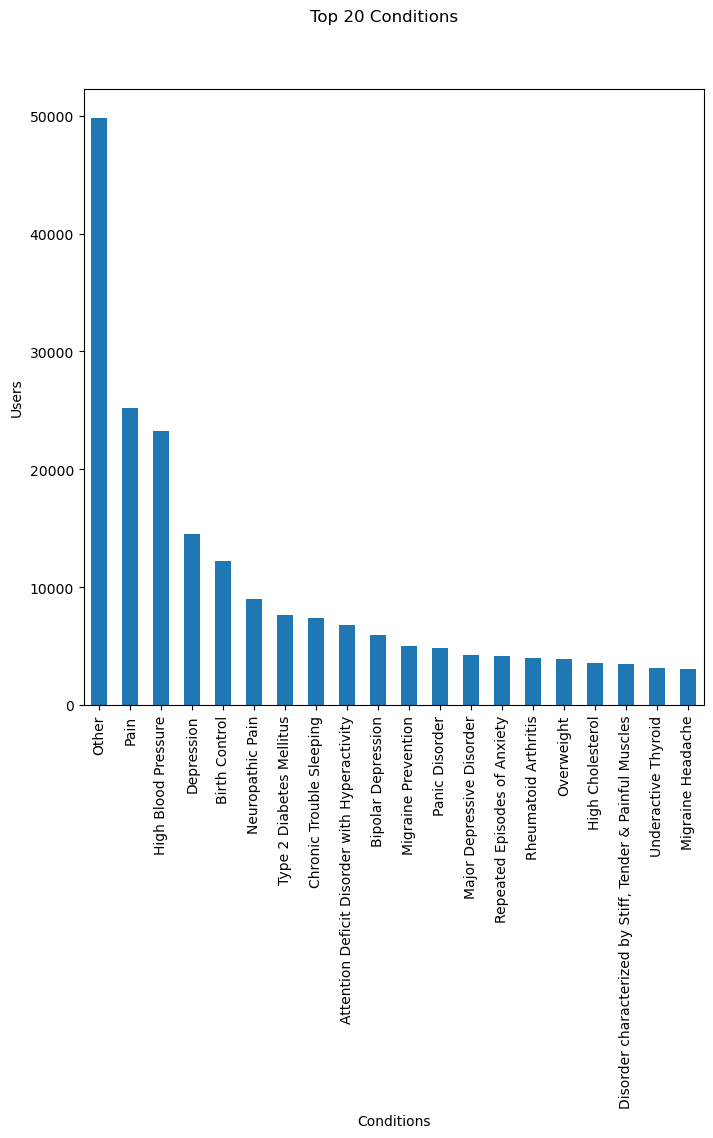

In [95]:
df1['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(8,8))
plt.suptitle("Top 20 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')

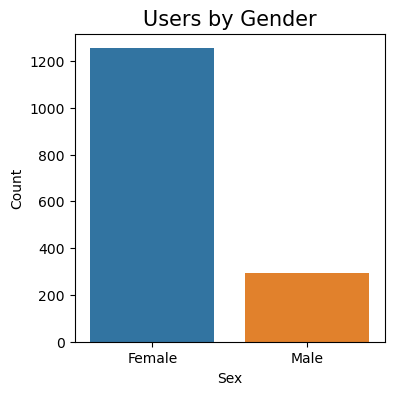

In [98]:
plt.figure(figsize = (4,4))
s=sns.countplot(x='Sex', data=data_copy)
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Count') 
plt.show()

Text(0, 0.5, 'Count')

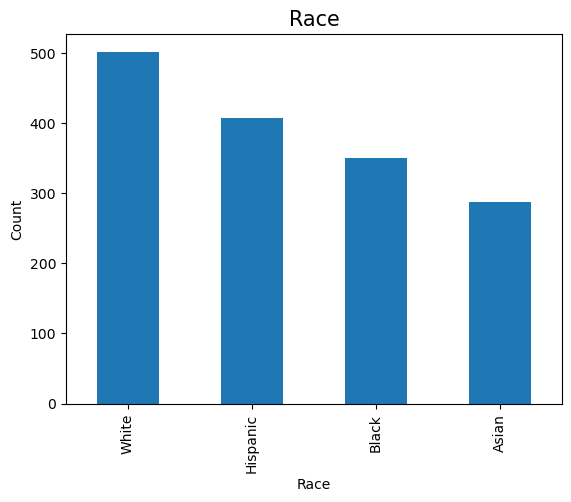

In [100]:
data_copy['Race'].value_counts().plot(kind='bar')
plt.title("Race", fontsize = 15)
plt.xlabel("Race", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

Text(0.5, 1.0, 'Users by Race and Gender')

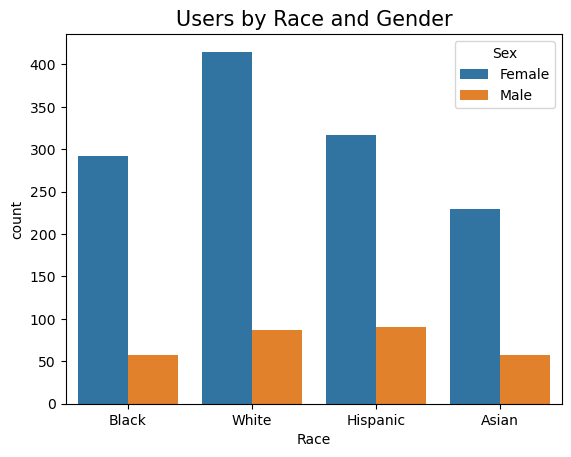

In [102]:
sns.countplot(x='Race',hue='Sex',data=data_copy)
plt.title("Users by Race and Gender", fontsize = 15)

Text(0.5, 1.0, 'Users by Age and Gender')

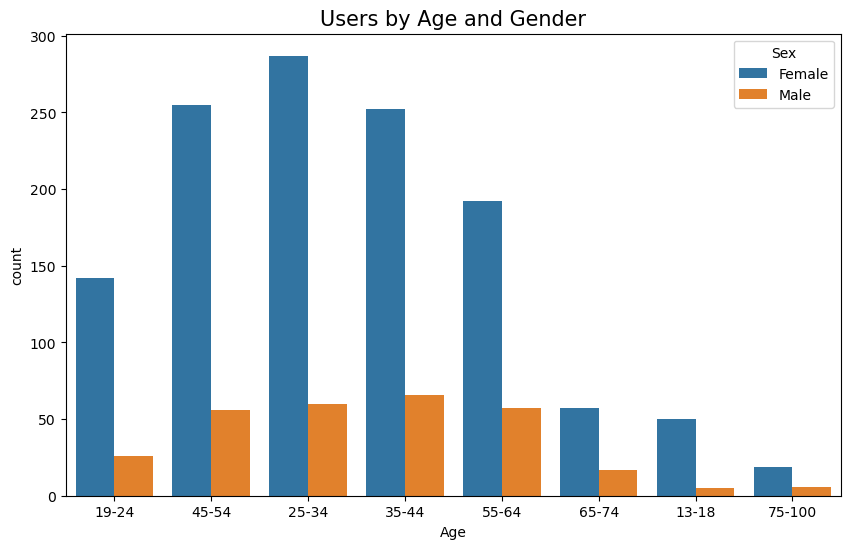

In [103]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=data_copy)
plt.title("Users by Age and Gender", fontsize = 15)

Yearly Reviews of Celexia

In [104]:
data_copy['Date'] = pd.to_datetime(data_copy['Date'], errors = 'coerce')

In [105]:
#extracting year from Date
data_copy['Year'] = data_copy['Date'].dt.year

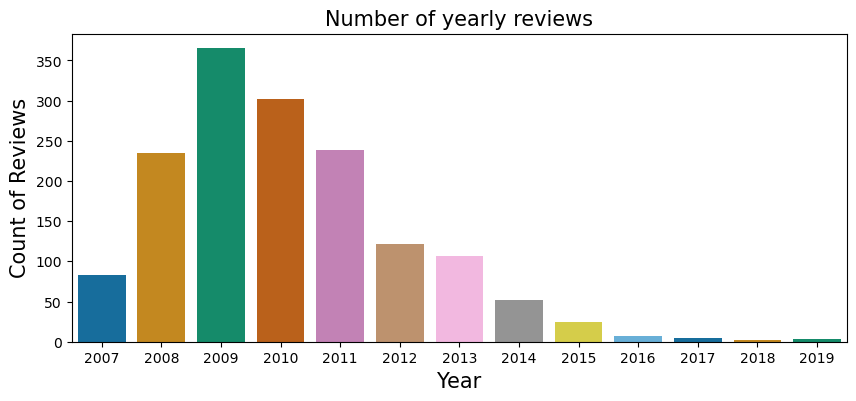

In [106]:
plt.figure(figsize=(10,4))
sns.countplot(data_copy['Year'], palette ='colorblind')
plt.title('Number of yearly reviews', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

Text(0, 0.5, 'Count')

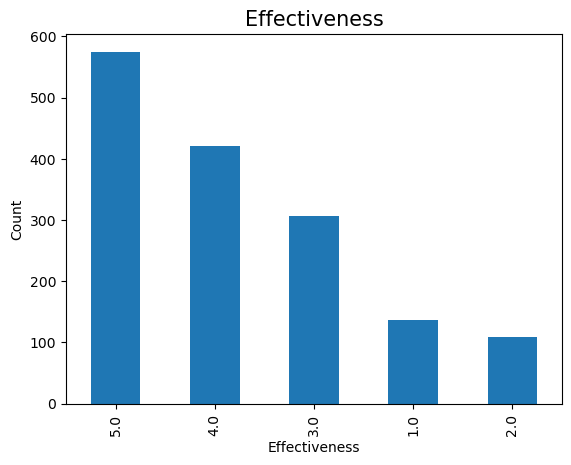

In [107]:
data_copy['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness", fontsize = 15)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

Text(0, 0.5, 'Count')

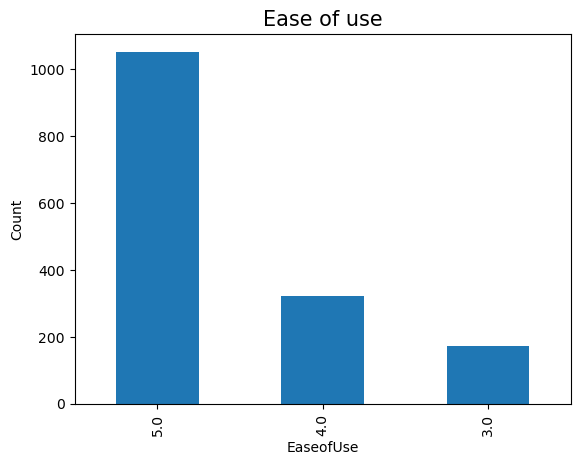

In [111]:
data_copy['EaseofUse'].value_counts().plot(kind='bar')
plt.title("Ease of use", fontsize = 15)
plt.xlabel("EaseofUse", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

Text(0, 0.5, 'Count')

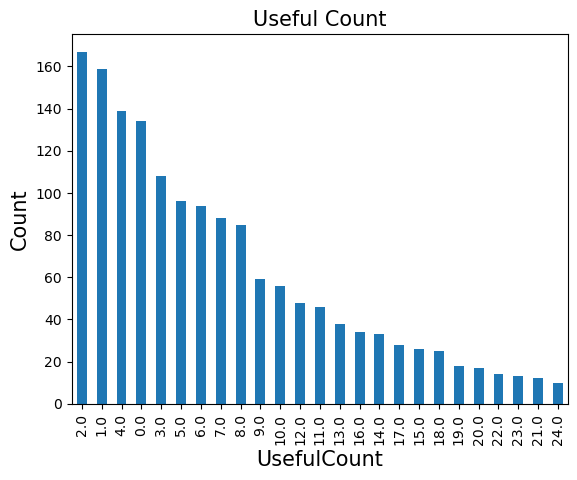

In [112]:
data_copy['UsefulCount'].value_counts().plot(kind='bar')
plt.title("Useful Count", fontsize = 15)
plt.xlabel("UsefulCount", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

<Figure size 1000x800 with 0 Axes>

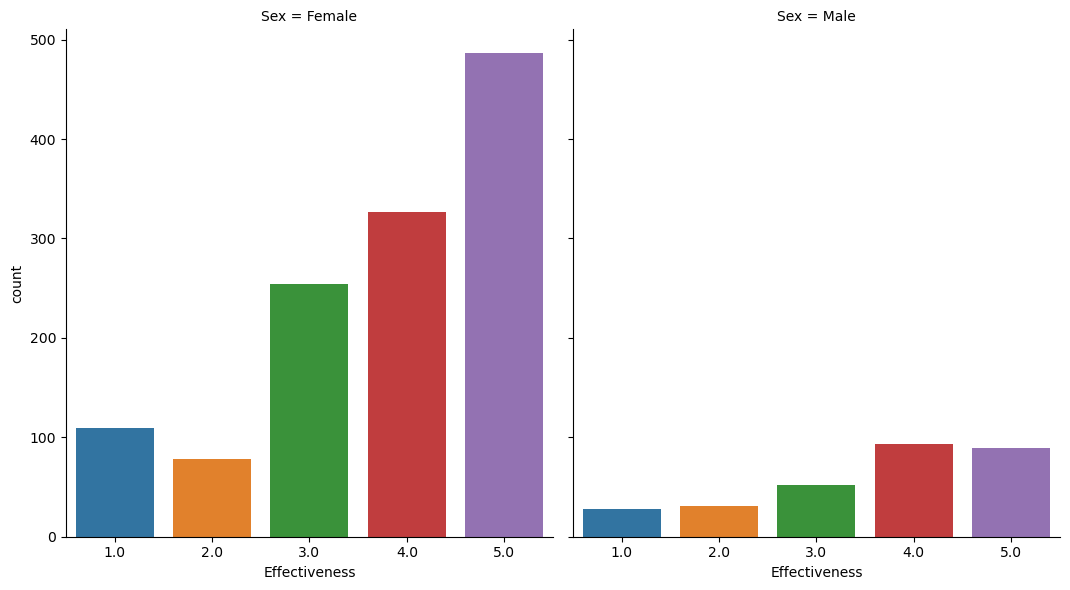

In [113]:
#Users by Effectiveness and Gender
plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=data_copy, kind="count",
                height=6,aspect =.9);

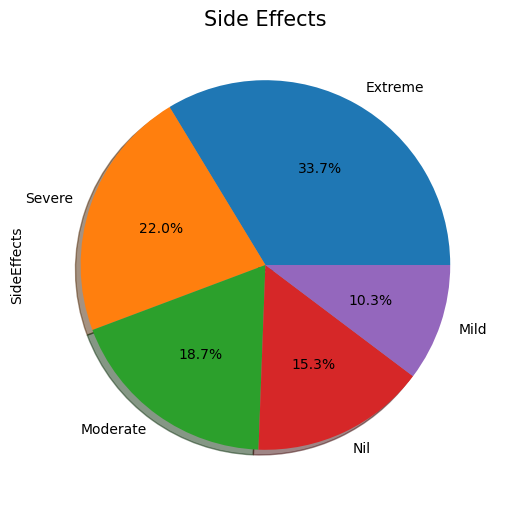

In [114]:
plt.figure(figsize=(6,6))
data_copy['SideEffects'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title("Side Effects", fontsize = 15)
plt.show()

<AxesSubplot:title={'center':'Age and Side effects'}, xlabel='Age', ylabel='count'>

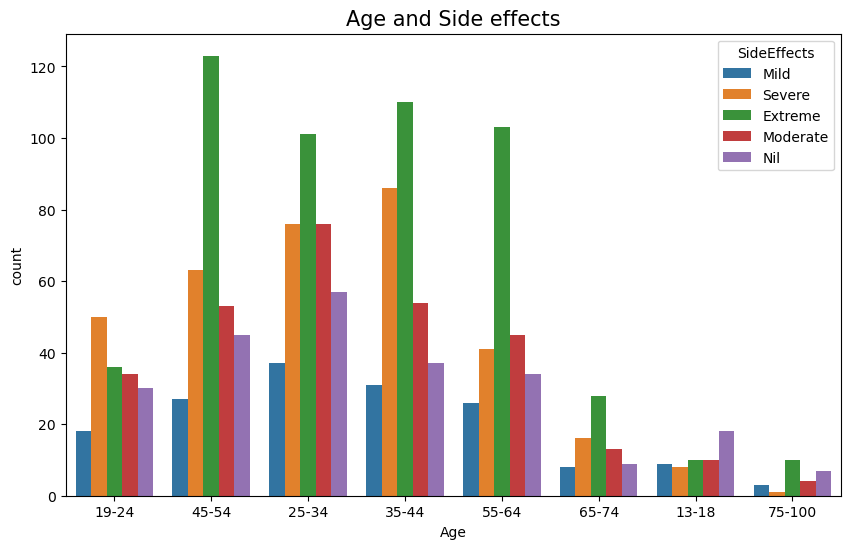

In [115]:
plt.figure(figsize=(10, 6))
plt.title("Age and Side effects", fontsize=15)
sns.countplot(x='Age',hue='SideEffects',data=data_copy)

<Figure size 2000x1000 with 0 Axes>

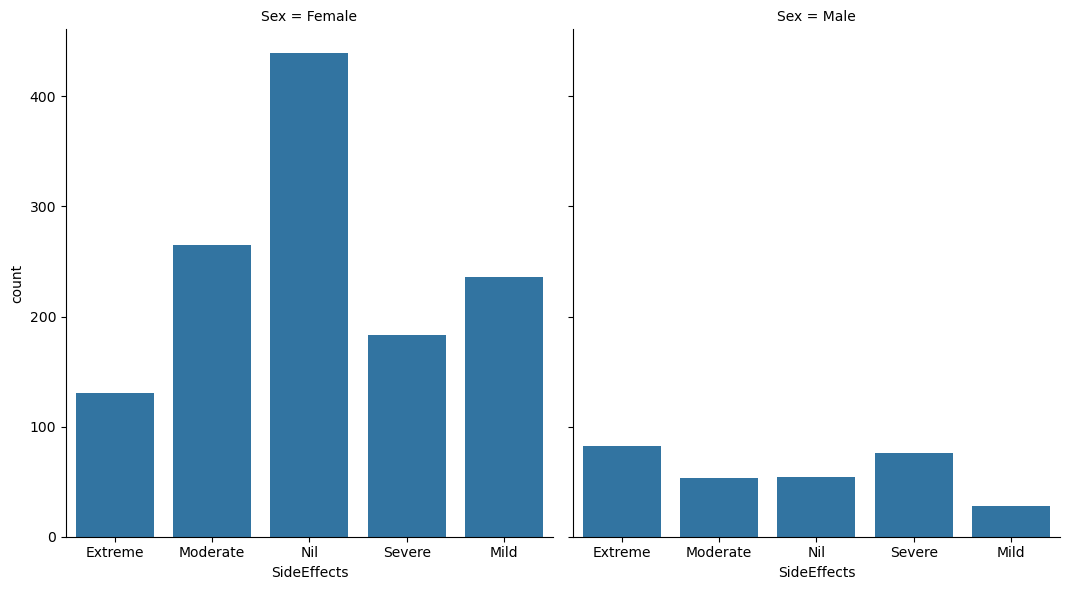

In [119]:
plt.figure(figsize=(20, 10))
plt.suptitle("Gender and Side Effects", fontsize=15)

g = sns.FacetGrid(data_copy, col="Sex", height=6, aspect=0.9)
g.map(sns.countplot, "SideEffects")
plt.show()

<AxesSubplot:title={'center':'Race and Side effects'}, xlabel='Race', ylabel='count'>

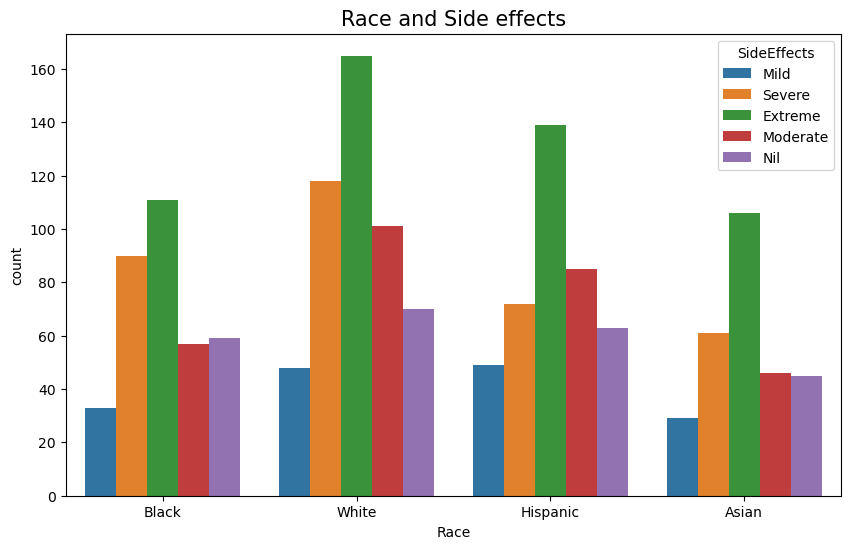

In [120]:
plt.figure(figsize=(10, 6))
plt.title("Race and Side effects", fontsize=15)
sns.countplot(x='Race',hue='SideEffects',data=data_copy)

# Splitting the data

In [121]:
#target
y = data_new['SideEffects']

In [122]:
X = data_new.drop(['SideEffects'],axis=1)

In [123]:
X.shape

(1547, 6)

In [124]:
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=0.2)#assigninng values

In [125]:
X_train.shape

(1237, 6)

In [126]:
X_test.shape

(310, 6)

In [127]:
y_train.shape

(1237,)

In [128]:
y_test.shape

(310,)

# Building the Model

Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(multi_class='multinomial')
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)

In [130]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score,classification_report

In [131]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  58.70967741935483


In [132]:
confusion_matrix(y_test,y_pred)

array([[76,  0,  1,  0, 22],
       [ 2,  0, 16, 14,  1],
       [ 8,  2, 31,  3, 14],
       [ 3,  1,  8, 33,  4],
       [21,  0,  8,  0, 42]], dtype=int64)

KNN Model

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:
acc_values = []
neighbors = np.arange(3,15)

# creating a loop to create KNN model for each K value
for k in neighbors:
#taking the instance of KNN to a variable.the variable name is classifier.
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski')    #no: of neighbors n the methode to measure the distance .instance is created
#we have to create the model.
    classifier = KNeighborsClassifier(n_neighbors= k)
    classifier.fit(X_train,y_train)
#have to predict output using this model.
    y_pred = classifier.predict(X_test)#KNN is created
#append the accurcy values to empty list in order to fing out maximum accuracy.
    acc = accuracy_score(y_test, y_pred)#taking accuracy values to variable acc 
#append these accuracy values to our list
    acc_values.append(acc)

In [135]:
acc_values

[0.4935483870967742,
 0.4774193548387097,
 0.49032258064516127,
 0.49032258064516127,
 0.47419354838709676,
 0.49032258064516127,
 0.5225806451612903,
 0.5193548387096775,
 0.5064516129032258,
 0.5193548387096775,
 0.532258064516129,
 0.5258064516129032]

Text(0, 0.5, 'accuracy')

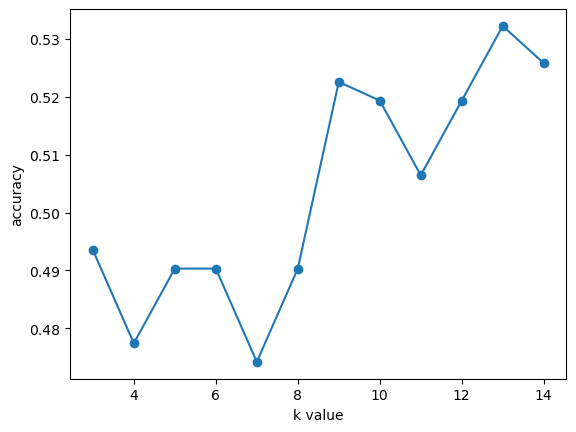

In [136]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [137]:
classifier = KNeighborsClassifier(n_neighbors= 13, metric = 'minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [138]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  53.2258064516129


In [139]:
confusion_matrix(y_test,y_pred)

array([[85,  0,  2,  0, 12],
       [ 3,  8, 12,  5,  5],
       [15,  7, 24,  1, 11],
       [ 4,  2, 13, 27,  3],
       [42,  2,  6,  0, 21]], dtype=int64)

In [140]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

In [141]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  50.967741935483865


In [142]:
confusion_matrix(y_test,y_pred)

array([[76,  3,  3,  2, 15],
       [ 3, 11, 10,  8,  1],
       [13, 16, 17,  4,  8],
       [ 4,  5, 10, 28,  2],
       [24,  6, 12,  3, 26]], dtype=int64)

Linear SVM

In [143]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')#creating an instance
svm_linear.fit(X_train,y_train)
y_pred = svm_linear.predict(X_test)

In [144]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  60.0


In [145]:
confusion_matrix(y_test,y_pred)

array([[76,  0,  0,  0, 23],
       [ 2,  0, 16, 14,  1],
       [ 8,  1, 33,  2, 14],
       [ 3,  0,  9, 33,  4],
       [21,  0,  6,  0, 44]], dtype=int64)

Polynomial SVM

In [146]:
svm_poly = SVC(kernel = 'poly', degree=3)
svm_poly.fit(X_train,y_train)
y_pred = svm_poly.predict(X_test)

In [147]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  54.516129032258064


In [148]:
confusion_matrix(y_test,y_pred)

array([[78,  0,  0,  0, 21],
       [ 4,  2, 15, 11,  1],
       [12,  4, 29,  0, 13],
       [ 5,  1,  9, 30,  4],
       [35,  0,  6,  0, 30]], dtype=int64)

Radial SVM

In [149]:
svm_radial = SVC(kernel='rbf')
svm_radial.fit(X_train,y_train)
y_pred=svm_radial.predict(X_test)

In [150]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  59.03225806451613


In [151]:
confusion_matrix(y_test,y_pred)

array([[76,  0,  0,  0, 23],
       [ 2,  1, 19, 10,  1],
       [ 8,  1, 32,  1, 16],
       [ 3,  0, 12, 30,  4],
       [21,  0,  6,  0, 44]], dtype=int64)

Random Forest Classifier

In [152]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
#training the model
rf.fit(X_train,y_train)
#to make predictions
y_pred=rf.predict(X_test)

In [153]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  55.80645161290323


In [154]:
confusion_matrix(y_test,y_pred)

array([[75,  3,  6,  0, 15],
       [ 2,  8, 10, 11,  2],
       [ 8, 10, 23,  7, 10],
       [ 3,  4,  9, 30,  3],
       [18,  6,  9,  1, 37]], dtype=int64)

In [155]:
# Feature Importance
pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)*100

Effectiveness    45.485134
Age              18.367701
Condition        14.456487
Race             10.870808
EaseofUse         7.371288
Sex               3.448582
dtype: float64

# Hyperparameter Tuning

In [156]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [157]:
# creating another instance of random forest classifier with some changes in hyperparameter
rft= RandomForestClassifier(bootstrap=True, n_estimators=1000,max_depth=8,random_state =42,criterion='entropy')

In [158]:
rft.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=1000,
                       random_state=42)

In [159]:
y_pred=rft.predict(X_test)

In [160]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  59.67741935483871


Gradient Boosting

In [161]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

In [162]:
print('Accuracy is: ',accuracy_score(y_test,y_pred)*100)

Accuracy is:  60.64516129032258


In [163]:
confusion_matrix(y_test,y_pred)

array([[75,  2,  1,  0, 21],
       [ 2, 12, 10,  8,  1],
       [ 9,  4, 31,  4, 10],
       [ 3,  4,  8, 30,  4],
       [21,  1,  9,  0, 40]], dtype=int64)

Extreme Gradient Boosting

In [164]:
from xgboost import XGBClassifier
#creating an instance
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred= xgb.predict(X_test)

In [165]:
print('Accuracy is: ',accuracy_score(y_test,y_pred)*100)

Accuracy is:  54.516129032258064


In [166]:
confusion_matrix(y_test,y_pred)

array([[77,  4,  4,  0, 14],
       [ 2,  8,  7, 14,  2],
       [10, 10, 23,  4, 11],
       [ 3,  6,  9, 28,  3],
       [25,  5,  8,  0, 33]], dtype=int64)